# Regression & Its Evaluation

Question 1: What is Simple Linear Regression?

Answer - Simple Linear Regression is a statistical method used to study the relationship between **two variables** — one **independent variable (X)** and one **dependent variable (Y)**.

It tries to fit a **straight line** that best represents the relationship between them. The equation of this line is:

[
Y = b_0 + b_1X
]

Where:

* **Y** = Dependent variable (the one we want to predict)
* **X** = Independent variable (the one we use to make predictions)
* **b₀** = Intercept (value of Y when X = 0)
* **b₁** = Slope (shows how much Y changes for a one-unit change in X)

**Example:**
If we want to predict a bike’s selling price based on its age, then:

* X = Bike’s age
* Y = Selling price

As the bike’s age increases, the selling price usually decreases — this relationship can be modeled using simple linear regression.




Question 2: What are the key assumptions of Simple Linear Regression?

**Answer -**
 The key assumptions of **Simple Linear Regression** are:

1. **Linearity:**
   The relationship between the independent variable (X) and dependent variable (Y) should be **linear** — meaning Y changes at a constant rate with X.

2. **Independence:**
   The observations in the dataset should be **independent** of each other (no repeated or related data points).

3. **Homoscedasticity:**
   The **variance of errors** (difference between actual and predicted values) should be **constant** across all values of X.

4. **Normality of Errors:**
   The **residuals (errors)** should be **normally distributed** — this helps in making reliable predictions and hypothesis tests.

5. **No Multicollinearity (for multiple regression):**
   In simple linear regression, there’s only one independent variable, but if there were more, the independent variables shouldn’t be highly correlated.

**In short:**
The data should form a straight-line pattern, errors should be random and evenly spread, and there should be no pattern or bias in the residuals.


Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

Answer -
**Heteroscedasticity** means that the **variance of the errors (residuals)** in a regression model is **not constant** across all levels of the independent variable.

In simple terms, the **spread of the residuals changes** — for example, the errors might be small for lower values of X but large for higher values.

**Example:**
If we are predicting bike prices, the difference between predicted and actual prices might be small for cheaper bikes but very large for expensive bikes — this shows heteroscedasticity.

**Why it’s important to address:**

* It **violates one of the key assumptions** of linear regression (homoscedasticity).
* It can lead to **inefficient estimates** of coefficients.
* The **standard errors become unreliable**, which affects **t-tests and confidence intervals**, making the model’s conclusions less trustworthy.

**In short:**
Heteroscedasticity means uneven error variance, and fixing it (using transformations or robust standard errors) helps make the regression model **more accurate and reliable**.




Question 4: What is Multiple Linear Regression?

**Answer :**

**Multiple Linear Regression (MLR)** is a statistical technique used to study the relationship between **one dependent variable (Y)** and **two or more independent variables (X₁, X₂, X₃, ...)**.

It extends **Simple Linear Regression**, which uses only one independent variable, by allowing multiple factors to influence the outcome.

The general equation is:

[
Y = b_0 + b_1X_1 + b_2X_2 + b_3X_3 + \ldots + b_nX_n
]

Where:

* **Y** = Dependent variable (what we want to predict)
* **X₁, X₂, X₃, ...** = Independent variables (factors affecting Y)
* **b₀** = Intercept
* **b₁, b₂, b₃, ...** = Coefficients showing how much Y changes when each X changes

**Example:**
If we want to predict a bike’s **selling price**, we might use:

* **X₁:** Bike’s age
* **X₂:** Kilometers driven
* **X₃:** Engine capacity

Then the model combines all these factors to predict the price more accurately than using just one variable.


Question 5: What is polynomial regression, and how does it differ from linear
regression?


**Answer :**

**Polynomial Regression** is a type of regression where the relationship between X and Y is modeled as a **curve** instead of a straight line.

It adds powers of X (like X², X³, etc.) to capture **non-linear patterns** in the data.

**Difference:**

* **Linear Regression** → Fits a straight line.
* **Polynomial Regression** → Fits a curved line.

**Example:**
If bike price decreases faster for older bikes at first and then slowly, polynomial regression can show that curved trend better.



Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points

Intercept (b0): 0.17999999999999794
Slope (b1): 1.9800000000000004


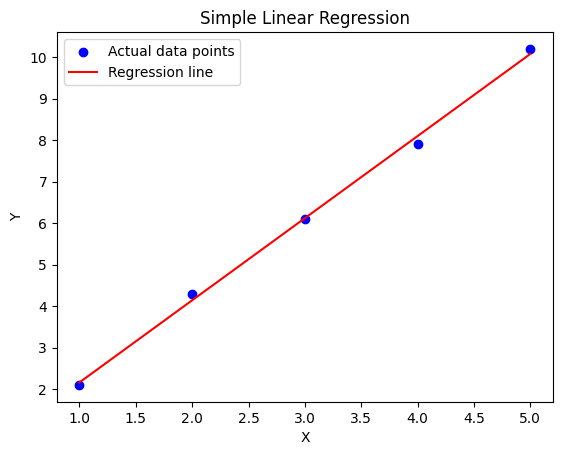

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.


In [6]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
Y = df['Price']

model = LinearRegression()
model.fit(X, Y)

print("Intercept (b0):", model.intercept_)
print("Coefficients:", model.coef_)

X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVIF Values:")
print(vif_data)


Intercept (b0): 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

VIF Values:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Question 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept (b0): 0.06000000000000938
Coefficients (b1, b2): [0.   1.94 0.2 ]


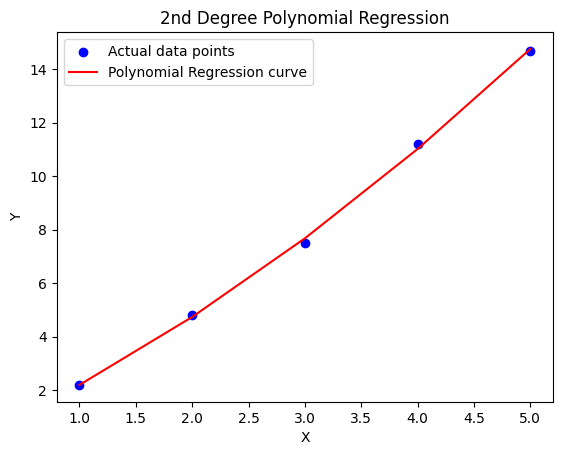

In [7]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X, Y_pred, color='red', label='Polynomial Regression curve')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.legend()
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

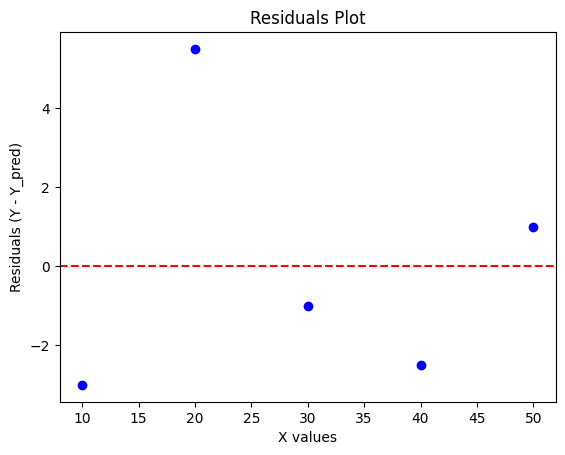

In [8]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X values")
plt.ylabel("Residuals (Y - Y_pred)")
plt.title("Residuals Plot")
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


**Answer :**

If I were a data scientist predicting house prices and found **heteroscedasticity** and **multicollinearity**, I would take the following steps to fix them and make my model more reliable



### **1. Dealing with Heteroscedasticity:**

Heteroscedasticity means the **variance of residuals is not constant** — errors get larger or smaller as predictions increase.
To fix it, I would:

**a. Transform the dependent variable (Y):**
Use transformations like **log(Y)**, **√Y**, or **Box-Cox** to make the variance more stable.

**b. Use Weighted Least Squares (WLS):**
Give **less weight** to data points with large errors, so the model focuses on consistent variance.

**c. Use Robust Standard Errors:**
They make the model’s coefficient estimates more reliable even when variance is not constant.

**d. Check for missing variables:**
Sometimes heteroscedasticity appears because an important variable (like house age or neighborhood rating) is missing — so I’d check if I can add those.

### **2. Dealing with Multicollinearity:**

Multicollinearity means **independent variables are highly correlated** with each other — e.g., “area” and “number of rooms” might increase together.
To fix it, I would:

**a. Calculate VIF (Variance Inflation Factor):**
Remove or combine variables with **VIF > 10**, since they cause instability in the coefficients.

**b. Drop redundant variables:**
If two features convey the same information, I’d keep only one (e.g., “area” instead of both “area” and “house size”).

**c. Use Dimensionality Reduction:**
Apply **Principal Component Analysis (PCA)** to create uncorrelated components from the correlated features.

**d. Use Regularization Techniques:**
Models like **Ridge Regression** or **Lasso Regression** add penalties to large coefficients and reduce multicollinearity’s effect.


###  **3. Re-evaluate the Model:**

After applying these fixes, I would:

* Refit the regression model.
* Check residual plots again for heteroscedasticity.
* Recalculate VIF values.
* Evaluate model performance using **R²**, **Adjusted R²**, and **RMSE**.

### **Conclusion:**

By transforming variables, using robust methods, and handling correlated predictors, I can build a **stable and accurate regression model** that gives **trustworthy house price predictions**.
